In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.image as mpimg

from sklearn.cluster import KMeans

%matplotlib inline

input_file = 'base.csv'
output_file = 'searching_k2.csv'
cluster = 100

In [2]:
df = pd.read_csv(input_file,sep=';',decimal=',')
df.replace(to_replace=r'properties', value='jpg', regex=True,inplace=True)
df.head()

,name,b1,b2,h1,h2,s1,s2
0,0001BFD8A4B8735B5BEE52282B392820.jpg,0.4647965145718742,0.32173970803660196,0.4071637552766217,0.3724891993682404,0.4266859967637939,0.2972669844608622
1,000252148AEA0C1F52DF52067D47A924.jpg,0.9728764931169802,0.12490816829303285,0.0,0.0,0.0,0.0
2,00030CA61304CA486165F1FFE701DAF9.jpg,0.7369396703187162,0.17361123405382337,0.4680602352237899,0.17366607466548994,0.8686488625720191,0.2167704038402477
3,000502B337F3EECF034B4B202EC0250B.jpg,0.47285325451653126,0.32608111665242767,0.49178812803159494,0.22035922135828936,0.3455637393719832,0.21684421103410653
4,000527A374338971ADB8C68E3DD8FBAD.jpg,0.8094858788606986,0.3300581238396209,0.19563310138422288,0.34554802361750253,0.10586959330609105,0.24323208638722008


In [3]:
df.describe()

,name,b1,b2,h1,h2,s1,s2
count,96744,96744,96744,96744,96744,96744,96744
unique,96744,89696,89691,73476,73472,73516,73512
top,5882B56C1BAF8EABF67F4F2C2A4E6721.jpg,1.0,0.0,0.0,0.0,0.0,0.0
freq,1,1997,2012,17782,17788,17782,17787


In [4]:
print('----- processing {} clusters'.format(cluster))

start_time = time.time()
X = df.iloc[:, 1:].values

kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state = 0, n_jobs = -1)
kmeans.fit(X)

df['cat0'] = kmeans.fit_predict(X)
df.to_csv(output_file)

print('>>>>> elapsed time {}'.format(time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time))))

----- processing 100 clusters
>>>>> elapsed time 00:03:29


In [5]:
#processing 100 sub-clusters for each 100 top-clusters

start_time = time.time()
df['cat1']=''

for cat in df.cat0.unique():
    X = df[df.cat0==cat].iloc[:, 1:7].values
    print('processing cat {} - {} samples'.format(cat,X[1,:].shape))
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state = 0, n_jobs = -1)
    kmeans.fit(X)
    df.loc[df.cat0==cat, 'cat1'] = kmeans.fit_predict(X)
    df.to_csv(output_file)

print('>>>>> elapsed time {}'.format(time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time))))
    

processing cat 36 - (6,) samples
processing cat 1 - (6,) samples
processing cat 11 - (6,) samples
processing cat 85 - (6,) samples
processing cat 35 - (6,) samples
processing cat 69 - (6,) samples
processing cat 16 - (6,) samples
processing cat 37 - (6,) samples
processing cat 38 - (6,) samples
processing cat 26 - (6,) samples
processing cat 31 - (6,) samples
processing cat 82 - (6,) samples
processing cat 88 - (6,) samples
processing cat 81 - (6,) samples
processing cat 91 - (6,) samples
processing cat 68 - (6,) samples
processing cat 52 - (6,) samples
processing cat 2 - (6,) samples
processing cat 72 - (6,) samples
processing cat 19 - (6,) samples
processing cat 78 - (6,) samples
processing cat 13 - (6,) samples
processing cat 30 - (6,) samples
processing cat 43 - (6,) samples
processing cat 90 - (6,) samples
processing cat 53 - (6,) samples
processing cat 97 - (6,) samples
processing cat 79 - (6,) samples
processing cat 39 - (6,) samples
processing cat 7 - (6,) samples
processing ca

In [6]:
df.head()

,name,b1,b2,h1,h2,s1,s2,cat0,cat1
0,0001BFD8A4B8735B5BEE52282B392820.jpg,0.4647965145718742,0.32173970803660196,0.4071637552766217,0.3724891993682404,0.4266859967637939,0.2972669844608622,36,1
1,000252148AEA0C1F52DF52067D47A924.jpg,0.9728764931169802,0.12490816829303285,0.0,0.0,0.0,0.0,1,65
2,00030CA61304CA486165F1FFE701DAF9.jpg,0.7369396703187162,0.17361123405382337,0.4680602352237899,0.17366607466548994,0.8686488625720191,0.2167704038402477,11,25
3,000502B337F3EECF034B4B202EC0250B.jpg,0.47285325451653126,0.32608111665242767,0.49178812803159494,0.22035922135828936,0.3455637393719832,0.21684421103410653,85,47
4,000527A374338971ADB8C68E3DD8FBAD.jpg,0.8094858788606986,0.3300581238396209,0.19563310138422288,0.34554802361750253,0.10586959330609105,0.24323208638722008,35,70


In [10]:
df['cat-0-1']=df.cat0*100+df.cat1

In [19]:
df.head(15)

,name,b1,b2,h1,h2,s1,s2,cat0,cat1,cat-0-1
0,0001BFD8A4B8735B5BEE52282B392820.jpg,0.4647965145718742,0.32173970803660196,0.4071637552766217,0.3724891993682404,0.4266859967637939,0.2972669844608622,36,1,3601
1,000252148AEA0C1F52DF52067D47A924.jpg,0.9728764931169802,0.12490816829303285,0.0,0.0,0.0,0.0,1,65,165
2,00030CA61304CA486165F1FFE701DAF9.jpg,0.7369396703187162,0.17361123405382337,0.4680602352237899,0.17366607466548994,0.8686488625720191,0.2167704038402477,11,25,1125
3,000502B337F3EECF034B4B202EC0250B.jpg,0.47285325451653126,0.32608111665242767,0.49178812803159494,0.22035922135828936,0.3455637393719832,0.21684421103410653,85,47,8547
4,000527A374338971ADB8C68E3DD8FBAD.jpg,0.8094858788606986,0.3300581238396209,0.19563310138422288,0.34554802361750253,0.10586959330609105,0.24323208638722008,35,70,3570
5,000551226CED95125B31C3DC9B121736.jpg,1.0,0.0,0.0,0.0,0.0,0.0,69,2,6902
6,00056E5CBBB70B82CDF2DECA54223AE2.jpg,0.9735148378443479,0.1136667798261188,0.02920217418772736,0.1298924534685253,0.0069596403670215655,0.0404745804537782,16,94,1694
7,0005B3F35F3414FC2A4EED1C06C20F68.jpg,0.901536115399303,0.15771387167629378,0.2816097109496786,0.29405956496212277,0.31019914226273954,0.3887128427576821,37,3,3703
8,0005C3E934FA9D32C3EF298456553581.jpg,0.875335612686974,0.21161785826492518,0.5151371076783274,0.16407828314519055,0.20257790238433393,0.3153398352804385,38,33,3833
9,0007537A2D49882D3650D9B5A879D46C.jpg,0.811909517240117,0.37856392419062185,0.0,0.0,0.0,0.0,26,27,2627


In [16]:
df.to_csv(output_file)

In [20]:
df.groupby('cat-0-1').count().head(30)

,name,b1,b2,h1,h2,s1,s2,cat0,cat1
cat-0-1,,,,,,,,,
0,4,4,4,4,4,4,4,4,4
1,5,5,5,5,5,5,5,5,5
2,8,8,8,8,8,8,8,8,8
3,5,5,5,5,5,5,5,5,5
4,6,6,6,6,6,6,6,6,6
5,3,3,3,3,3,3,3,3,3
6,11,11,11,11,11,11,11,11,11
7,9,9,9,9,9,9,9,9,9
8,7,7,7,7,7,7,7,7,7


In [15]:
df[df['cat-0-1']==6].name

12513    219A0C2CBF3B46A375CB11B2F6265C94.jpg
19490    33BA575AB379C181E417D12BF7EC085C.jpg
30577    50CEA38F1CD001D9857489E52FA86224.jpg
40134    69D7CDFAA17990E806E5149522FCFFA8.jpg
42745    70AF3480F1D581607563486B26CB0ECE.jpg
47911    7EA53EBEF59924EAA04F1F807650E644.jpg
49719    833A6BA83EDA39D3D38C3400EE904A91.jpg
53506    8D2642853DD636030A5BB473D930B710.jpg
60034    9E56376AABA271ACE507CC0A835A1C92.jpg
60319    9F22BDED9C07CBCAE0FC58D694727C41.jpg
84690    E02D2BF496181E6993FB7E0A87933A59.jpg
Name: name, dtype: object

In [29]:
def images_subset_plot(cluster,cat):
    
    if df[df['cat-0-1']==6].name.nunique() > 20:
        subset = df[df[cluster]==cat].sample(20)
    else:
        subset = df[df[cluster]==cat]
    print('sample')
    print(subset.name)
    
    images = []
    for index, row in enumerate(subset.name):
        images.append(mpimg.imread('../COVER_JPEG/'+row))

    plt.figure(figsize=(20,10))
    plt.suptitle('========{} cluster, cat {} ========'.format(cluster, cat), fontsize=16)
    columns = 5
    for i, image in enumerate(images):
        plt.subplot(len(images) / columns + 1, columns, i + 1)
        plt.imshow(image)

sample
14       000A8D34660928DC870BA292005420C7.jpg
992      02B548E54DFAE02837C91D7A607EC5FB.jpg
6746     124ACA9DEDDD7369EF78C94CF97EC276.jpg
15681    29CF9109D0B6F490F7063082D1DF8F42.jpg
15917    2A61E62DD7C20B29958D1168F7BB2477.jpg
35068    5C5DEDB776DA5D0838F52F3CB619C4A9.jpg
40416    6A9735451363E2C737055B82A8BE7CC9.jpg
43230    7211852B84ACC523B590427609AA28AB.jpg
74704    C605AE490BDC2068538014046EAEEBC7.jpg
83702    DDA9EF4A9B0D1506C6CAB8D938445ECF.jpg
87442    E75C3B402332FC063FAE11DA7F3B9C3E.jpg
93855    F843CA58A1573124481C402BC126459F.jpg
Name: name, dtype: object


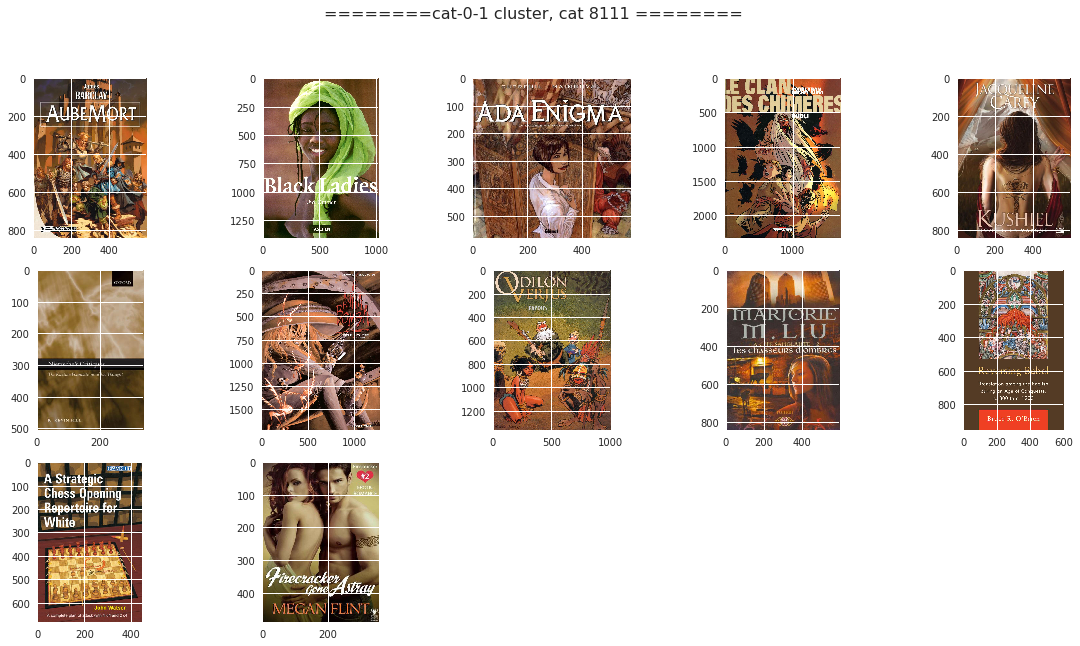

In [32]:
images_subset_plot('cat-0-1',8111)